In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f
from matplotlib import pyplot as plt
from statsmodels.stats.multitest import multipletests



def split_row_by_gender_and_smoking_status(row):

    male_non_smoker = row.iloc[1:13].tolist() 
    male_smoker = row.iloc[13:25].tolist() 
    female_non_smoker = row.iloc[25:37].tolist()
    female_smoker = row.iloc[37:49].tolist() 
    
    return np.array(male_non_smoker), np.array(male_smoker), np.array(female_non_smoker), np.array(female_smoker)


# def calculate_p_val(A):
#     m_s = A[0:12]
#     m_s_mean= np.mean(m_s)
#     # print(f'm_s_mean ={m_s_mean}')
#     m_ns= A[12:24]
#     m_ns_mean = np.mean(m_ns)
#     # print(f'm_ns_mean ={m_ns_mean}')
#     f_s = A[24:36]
#     f_s_mean = np.mean(f_s)
#     # print(f'f_s_mean ={f_s_mean}')
#     f_ns = A[36:48]
#     f_ns_mean = np.mean(f_ns)
#     # print(f'f_ns_mean ={f_ns_mean}')

#     m_mean= (m_s_mean + m_ns_mean) / 2
#     f_mean = (f_s_mean + f_ns_mean) / 2
#     s_mean = (m_s_mean + f_s_mean) / 2
#     ns_mean = (m_ns_mean + f_ns_mean) / 2

#     total_mean = np.mean(A)

#     # print(f'm_mean ={m_mean}, f_mean ={f_mean}, s_mean ={s_mean}, ns_mean ={ns_mean}, total_mean ={total_mean}')


#     num_people = 48
#     num_grps_for_gender = 2
#     num_grps_for_smoking = 2

#     #sum of squares - SS
#     SS_total = np.sum((A - total_mean) ** 2)
#     SS_gender = (num_people/num_grps_for_smoking) * ((m_mean - total_mean) ** 2 + (f_mean - total_mean) ** 2)
#     SS_smoking = (num_people/num_grps_for_gender) * ((s_mean - total_mean) ** 2 + (ns_mean - total_mean) ** 2)
#     SS_err = np.sum((m_s - m_s_mean) ** 2) + np.sum((m_ns - m_ns_mean) ** 2) + np.sum((f_s - f_s_mean) ** 2) + np.sum((f_ns - f_ns_mean) ** 2)
#     SS_gender_smoking = SS_total - SS_gender - SS_smoking - SS_err
#     # print(f"SS_total = {SS_total}, SS_gender = {SS_gender}, SS_smoking = {SS_smoking}, SS_err={SS_err}, SS_gender_smoking={SS_gender_smoking}")


#     #degrees of freedom - df
#     df_gender = num_grps_for_gender - 1
#     df_smoking = num_grps_for_smoking - 1
#     df_err = num_grps_for_gender*num_grps_for_smoking * (num_people/(num_grps_for_gender*num_grps_for_smoking) - 1)
#     df_gender_smoking = df_gender * df_smoking
#     df_total = df_gender + df_smoking + df_err + df_gender_smoking
#     # print(f'df_gender ={df_gender}, df_smoking={df_smoking}, df_err={df_err}, df_gender_smoking ={df_gender_smoking}, df_total={df_total}')

#     #mean square -msq
#     msq_gender = SS_gender/df_gender
#     msq_smoking = SS_smoking/df_smoking
#     msq_err = SS_err/df_err
#     msq_gender_smoking =SS_gender_smoking/df_gender_smoking
#     # print(f'msq_gender ={msq_gender}, msq_smoking={msq_smoking}, msq_err={msq_err}, msq_gender_smoking={msq_gender_smoking}')

#     # msq_err = msq_err + 0.0000001
#     #F-statistic
#     F_gender=msq_gender/msq_err
#     F_smoking=msq_smoking/msq_err
#     F_gender_smoking=msq_gender_smoking/msq_err
#     # print(f'F_gender = {F_gender}, F_smoking= {F_smoking}, F_gender_smoking={F_gender_smoking}')

#     p_val = round(1-f.cdf(F_gender_smoking,df_gender_smoking, df_err), 6)

#     return p_val


def calculate_p_val(A, epsilon=1e-6):  # Adding epsilon parameter for Laplace smoothing
    m_s = A[0:12]
    m_s_mean = np.mean(m_s)
    m_ns = A[12:24]
    m_ns_mean = np.mean(m_ns)
    f_s = A[24:36]
    f_s_mean = np.mean(f_s)
    f_ns = A[36:48]
    f_ns_mean = np.mean(f_ns)

    m_mean = (m_s_mean + m_ns_mean) / 2
    f_mean = (f_s_mean + f_ns_mean) / 2
    s_mean = (m_s_mean + f_s_mean) / 2
    ns_mean = (m_ns_mean + f_ns_mean) / 2
    total_mean = np.mean(A)

    num_people = 48
    num_grps_for_gender = 2
    num_grps_for_smoking = 2

    # Sum of squares - SS
    SS_total = np.sum((A - total_mean) ** 2)
    SS_gender = (num_people / num_grps_for_smoking) * ((m_mean - total_mean) ** 2 + (f_mean - total_mean) ** 2)
    SS_smoking = (num_people / num_grps_for_gender) * ((s_mean - total_mean) ** 2 + (ns_mean - total_mean) ** 2)
    SS_err = (np.sum((m_s - m_s_mean) ** 2) +
              np.sum((m_ns - m_ns_mean) ** 2) +
              np.sum((f_s - f_s_mean) ** 2) +
              np.sum((f_ns - f_ns_mean) ** 2))
    SS_gender_smoking = SS_total - SS_gender - SS_smoking - SS_err

    # Degrees of freedom - df
    df_gender = num_grps_for_gender - 1
    df_smoking = num_grps_for_smoking - 1
    df_err = num_grps_for_gender * num_grps_for_smoking * (num_people / (num_grps_for_gender * num_grps_for_smoking) - 1)
    df_gender_smoking = df_gender * df_smoking

    # Mean square - msq
    msq_gender = SS_gender / df_gender
    msq_smoking = SS_smoking / df_smoking
    msq_err = (SS_err / df_err) + epsilon  # Applying Laplace smoothing by adding epsilon to msq_err
    msq_gender_smoking = SS_gender_smoking / df_gender_smoking

    # F-statistic
    F_gender = msq_gender / msq_err
    F_smoking = msq_smoking / msq_err
    F_gender_smoking = msq_gender_smoking / msq_err

    p_val = round(1 - f.cdf(F_gender_smoking, df_gender_smoking, df_err), 6)
    return p_val



def run_main_algo(df):
    p_values = []
    probe_names =[]
    for index, row in df.iterrows():
        probe_names.append(row['ProbeName'])
        male_non_smoker, male_smoker, female_non_smoker, female_smoker = split_row_by_gender_and_smoking_status(row)
        male_non_smoker = male_non_smoker.reshape(-1, 1)
        male_smoker = male_smoker.reshape(-1,1)
        female_non_smoker = female_non_smoker.reshape(-1, 1)
        female_smoker = female_smoker.reshape(-1, 1)
        A = np.vstack((male_smoker, male_non_smoker, female_smoker, female_non_smoker))
        p_values.append(calculate_p_val(A))

    # print(len(p_values)) --- same as number of rows in the dataframe

    # Apply multiple testing correction (e.g., Benjamini-Hochberg)
    results_df = pd.DataFrame({'probe_name': probe_names, 'p_value': p_values})
    results_df['adjusted_p_value'] = multipletests(results_df['p_value'], method='fdr_bh')[1]
    significance_threshold = 0.05
    significant_probes = results_df[results_df['adjusted_p_value'] < significance_threshold]['probe_name'].tolist()

    #  # Applying Benjamini-Hochberg correction
    # reject, adjusted_p_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    # significant_probes = [probe for probe, is_significant in zip(probe_names, reject) if is_significant]
    
    print(f"The significant probes are: {significant_probes}")
    
    plt.hist(p_values, bins=20, color='lightgreen')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Histogram of p-values')
    # plt.savefig('plot_1_histogram.png')
    plt.show()

In [ ]:

df = pd.read_csv('Raw Data_GeneSpring.txt', sep='\t')
#Drop last 3 columns   #last 3 columns of df not important
df = df.iloc[:, :-3]

run_main_algo(df)

# Till this part is our Assignment 3
df_real = df

In [6]:
# # Uniform Distribution
# df_uniform = df_real.copy()
# for col in df_uniform.columns[1:]:
#     df_uniform[col] = np.random.uniform(0, 18, size=df_uniform.shape[0])

# # Normal Distribution
# df_normal = df_real.copy()
# for col in df_normal.columns[1:]:
#     df_normal[col] = np.random.normal(6, 4, size=df_normal.shape[0])

# # Poisson Distribution
# df_poisson = df_real.copy()
# for col in df_poisson.columns[1:]:
#     df_poisson[col] = np.random.poisson(6, size=df_poisson.shape[0])

# # Exponential Distribution
# df_exponential = df_real.copy()
# for col in df_exponential.columns[1:]:
#     df_exponential[col] = np.random.exponential(6, size=df_exponential.shape[0])

# # Log-Normal Distribution
# df_lognormal = df_real.copy()
# for col in df_lognormal.columns[1:]:
#     df_lognormal[col] = np.random.lognormal(1.5, 0.5, size=df_lognormal.shape[0])

# # Beta Distribution
# df_beta = df_real.copy()
# for col in df_beta.columns[1:]:
#     df_beta[col] = np.random.beta(2, 5, size=df_beta.shape[0]) * 18  # Scale to match data range

# # Chi-Squared Distribution
# df_chi_squared = df_real.copy()
# for col in df_chi_squared.columns[1:]:
#     df_chi_squared[col] = np.random.chisquare(4, size=df_chi_squared.shape[0])

# # Gamma Distribution
# df_gamma = df_real.copy()
# for col in df_gamma.columns[1:]:
#     df_gamma[col] = np.random.gamma(2, 3, size=df_gamma.shape[0])

# # Geometric Distribution
# df_geometric = df_real.copy()
# for col in df_geometric.columns[1:]:
#     df_geometric[col] = np.random.geometric(0.1, size=df_geometric.shape[0])
    
import pandas as pd
import numpy as np

# Assuming df_real is already loaded and processed as per your initial code
# df_real = pd.read_csv('Raw Data_GeneSpring.txt', sep='\t')
# df_real = df_real.iloc[:, :-3]  # Drop last 3 unnecessary columns

# Extract gene expression data
gene_expression = df_real.iloc[:, 1:]  # Assuming first column is 'ProbeName'

# Fitted Parameters
overall_mean = 6.8050
overall_std = 4.1252
overall_min = 0.0000
overall_max = 19.5638

# Log-Normal Parameters
mu_lognorm = 0.0549
sigma_lognorm = 5.0844

# Beta Distribution Parameters
alpha_beta = 0.3942
beta_beta = 1.0338

# Gamma Distribution Parameters (Shifted Data)
shape_gamma = 0.3594
scale_gamma = 18.9329

# Poisson Distribution Parameter
lambda_poisson = 6.8050

# Geometric Distribution Parameter
p_geometric = 0.1281

# Exponential Distribution Parameter
scale_exponential = 6.8050

# Chi-Squared Distribution Parameter
df_chi_squared = 6.8050

# Normal Distribution Parameters
mean_normal = 6.8050
std_normal = 4.1252

# Uniform Distribution Parameters
low_uniform = 0.0000
high_uniform = 19.5638

# Number of samples (rows) and features (columns)
num_samples, num_features = df_real.shape

# Function to generate synthetic data for each distribution
def generate_synthetic_data(distribution_name):
    df_synthetic = df_real.copy()
    for col in df_synthetic.columns[1:]:
        if distribution_name == 'uniform':
            df_synthetic[col] = np.random.uniform(low=low_uniform, high=high_uniform, size=num_samples)
        
        elif distribution_name == 'normal':
            df_synthetic[col] = np.random.normal(loc=mean_normal, scale=std_normal, size=num_samples)
        
        elif distribution_name == 'poisson':
            # Poisson is a discrete distribution; ensure lambda is positive
            if lambda_poisson > 0:
                df_synthetic[col] = np.random.poisson(lam=lambda_poisson, size=num_samples)
            else:
                raise ValueError("Lambda for Poisson distribution must be positive.")
        
        elif distribution_name == 'exponential':
            df_synthetic[col] = np.random.exponential(scale=scale_exponential, size=num_samples)
        
        elif distribution_name == 'lognormal':
            # In scipy, lognormal parameters are the mean and sigma of the underlying normal distribution
            df_synthetic[col] = np.random.lognormal(mean=mu_lognorm, sigma=sigma_lognorm, size=num_samples)
        
        elif distribution_name == 'beta':
            # Scale the Beta distribution to match the data range [low_uniform, high_uniform]
            beta_data = np.random.beta(a=alpha_beta, b=beta_beta, size=num_samples)
            df_synthetic[col] = beta_data * (high_uniform - low_uniform) + low_uniform
        
        elif distribution_name == 'chi_squared':
            df_synthetic[col] = np.random.chisquare(df=df_chi_squared, size=num_samples)
        
        elif distribution_name == 'gamma':
            # Gamma parameters: shape (k) and scale (theta)
            df_synthetic[col] = np.random.gamma(shape=shape_gamma, scale=scale_gamma, size=num_samples)
        
        elif distribution_name == 'geometric':
            # Geometric distribution in numpy counts the number of trials until first success, starting at 1
            df_synthetic[col] = np.random.geometric(p=p_geometric, size=num_samples)
        
        else:
            raise ValueError(f"Unsupported distribution: {distribution_name}")
    
    return df_synthetic

# Generate synthetic datasets for each distribution
df_uniform = generate_synthetic_data('uniform')
df_normal = generate_synthetic_data('normal')
df_poisson = generate_synthetic_data('poisson')
df_exponential = generate_synthetic_data('exponential')
df_lognormal = generate_synthetic_data('lognormal')
df_beta = generate_synthetic_data('beta')
df_chi_squared = generate_synthetic_data('chi_squared')
df_gamma = generate_synthetic_data('gamma')
df_geometric = generate_synthetic_data('geometric')

# Optional: Save the synthetic datasets to CSV files
# df_uniform.to_csv('Synthetic_Uniform.csv', index=False)
# df_normal.to_csv('Synthetic_Normal.csv', index=False)
# df_poisson.to_csv('Synthetic_Poisson.csv', index=False)
# df_exponential.to_csv('Synthetic_Exponential.csv', index=False)
# df_lognormal.to_csv('Synthetic_LogNormal.csv', index=False)
# df_beta.to_csv('Synthetic_Beta.csv', index=False)
# df_chi_squared.to_csv('Synthetic_ChiSquared.csv', index=False)
# df_gamma.to_csv('Synthetic_Gamma.csv', index=False)
# df_geometric.to_csv('Synthetic_Geometric.csv', index=False)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Number of significant probes after FDR correction (alpha=0.05): 0


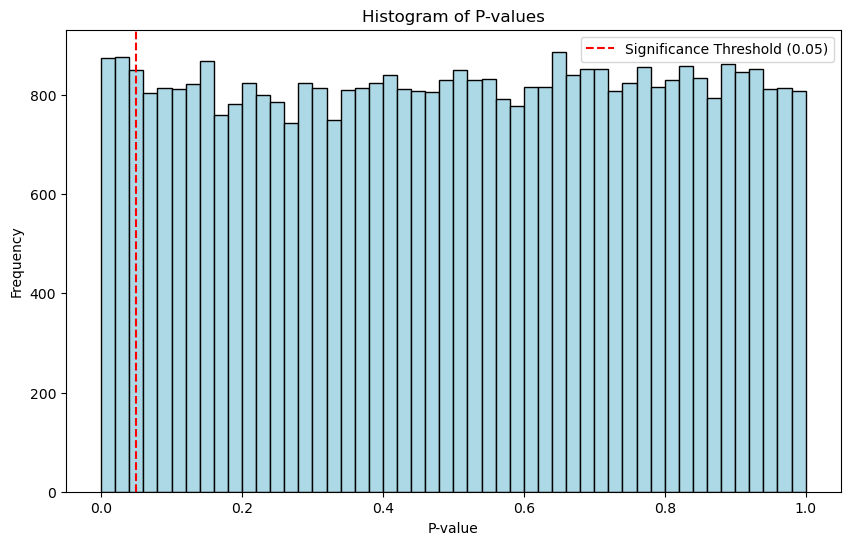

[]

In [7]:
run_main_algo(df_uniform)

Number of significant probes after FDR correction (alpha=0.05): 1


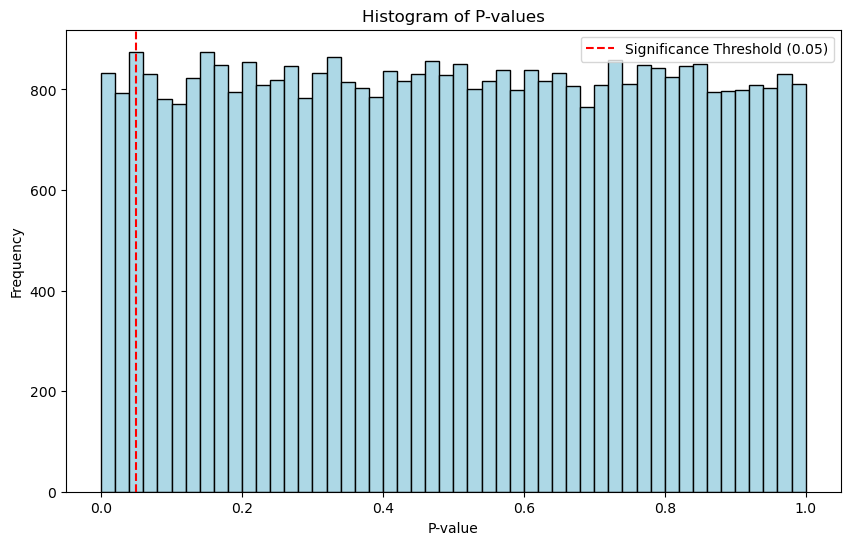

['A_32_P114615']

In [8]:
run_main_algo(df_normal)

Number of significant probes after FDR correction (alpha=0.05): 0


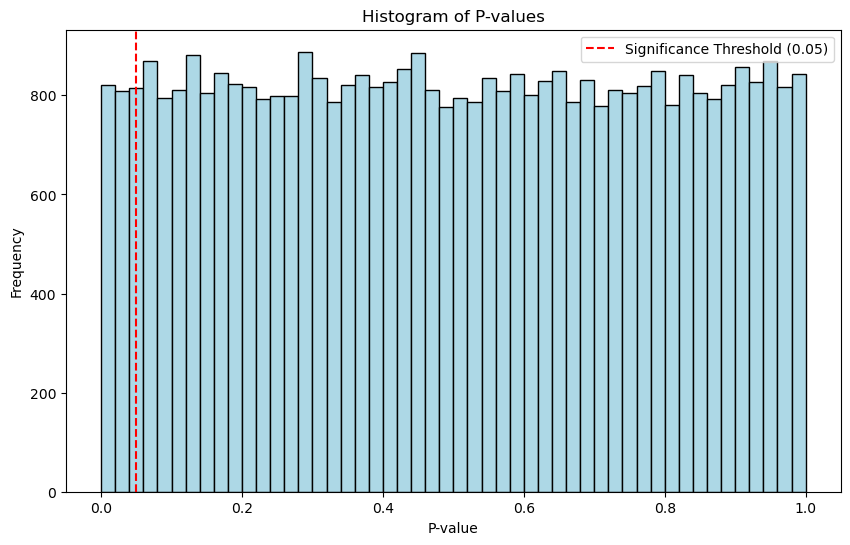

[]

In [9]:
run_main_algo(df_poisson)

Number of significant probes after FDR correction (alpha=0.05): 0


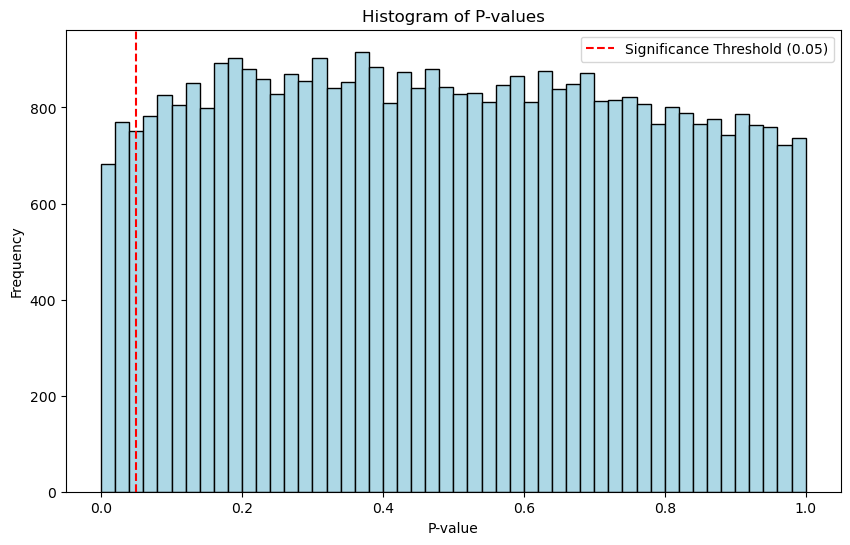

[]

In [10]:
run_main_algo(df_exponential)

Number of significant probes after FDR correction (alpha=0.05): 0


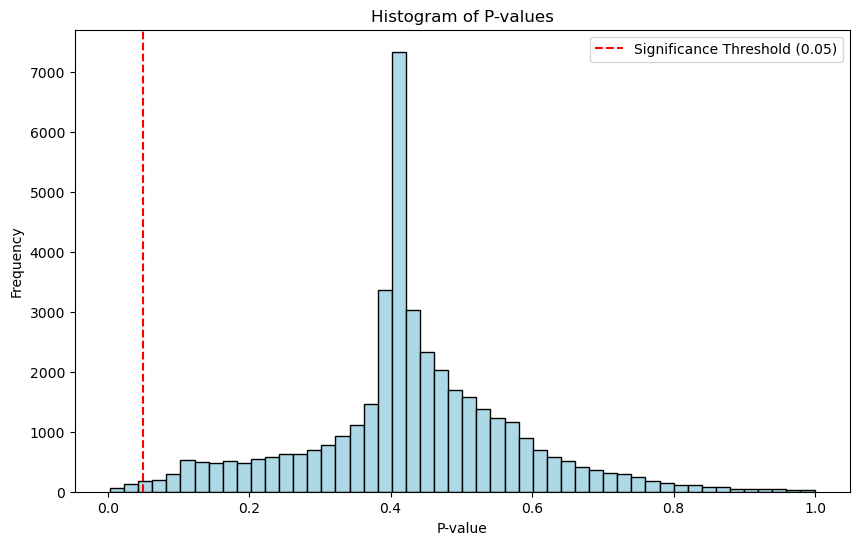

[]

In [11]:
run_main_algo(df_lognormal)

Number of significant probes after FDR correction (alpha=0.05): 0


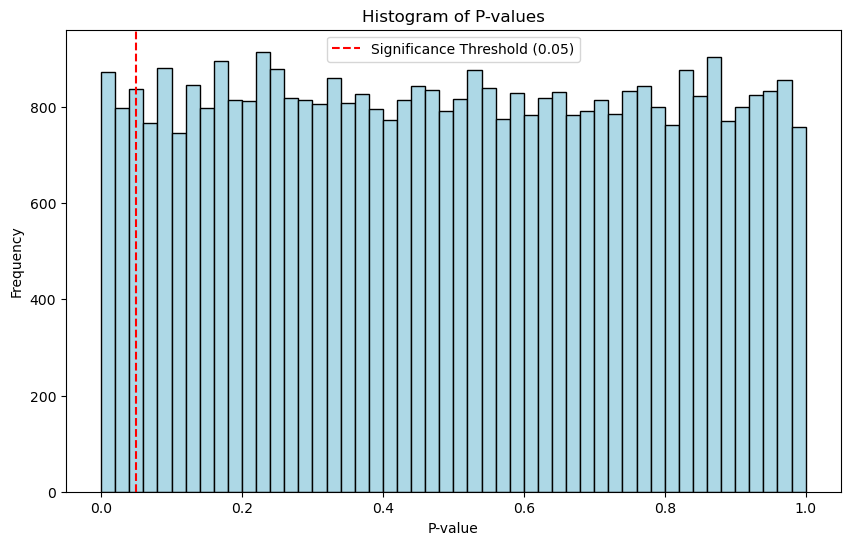

[]

In [12]:
run_main_algo(df_beta)

Number of significant probes after FDR correction (alpha=0.05): 0


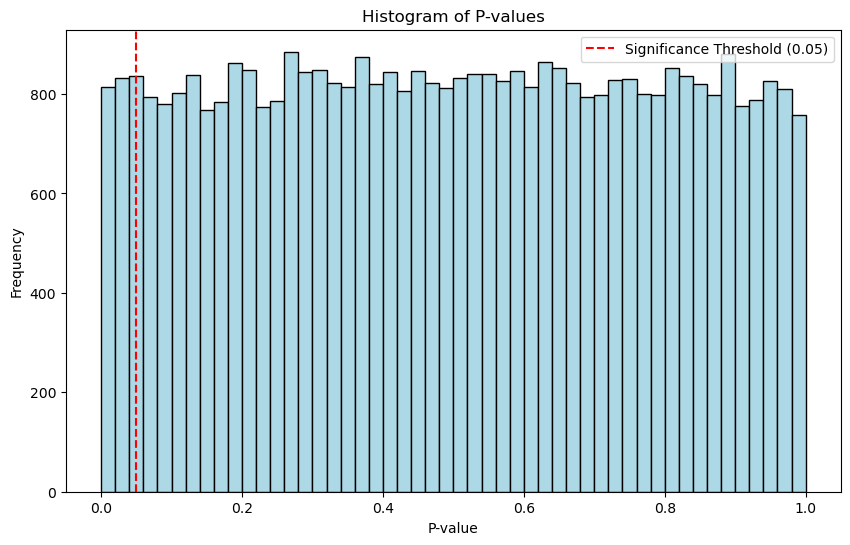

[]

In [13]:
run_main_algo(df_chi_squared)

Number of significant probes after FDR correction (alpha=0.05): 0


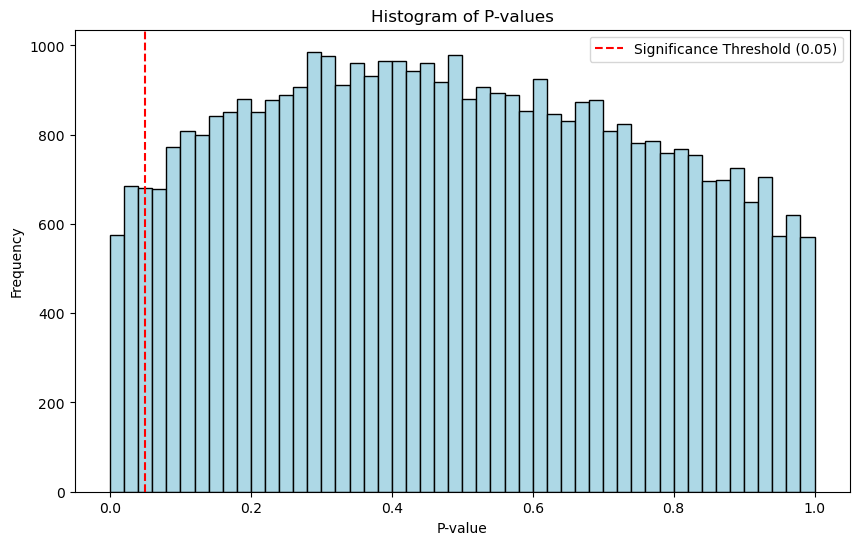

[]

In [14]:
run_main_algo(df_gamma)

Number of significant probes after FDR correction (alpha=0.05): 0


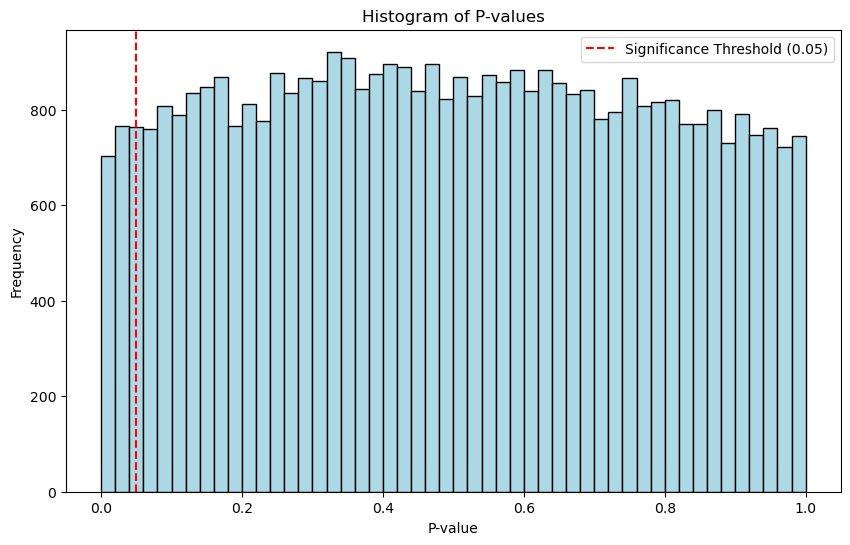

[]

In [15]:
run_main_algo(df_geometric)

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import f_oneway, ks_2samp
# from statsmodels.stats.multitest import multipletests
# from matplotlib import pyplot as plt

# def split_row_by_gender_and_smoking_status(row):
#     """
#     Splits a row into four groups based on gender and smoking status.
#     """
#     male_non_smoker = row.iloc[1:13].tolist()
#     male_smoker = row.iloc[13:25].tolist()
#     female_non_smoker = row.iloc[25:37].tolist()
#     female_smoker = row.iloc[37:49].tolist()

#     return np.array(male_non_smoker), np.array(male_smoker), np.array(female_non_smoker), np.array(female_smoker)

# def calculate_p_val(A):
#     """
#     Calculates the p-value using One-Way ANOVA for the given data.
#     """
#     # Define the number of samples per group
#     samples_per_group = 12  # Adjust this if your group sizes differ

#     # Split the concatenated array back into individual groups
#     male_smoker = A[0:samples_per_group]
#     male_non_smoker = A[samples_per_group:2*samples_per_group]
#     female_smoker = A[2*samples_per_group:3*samples_per_group]
#     female_non_smoker = A[3*samples_per_group:4*samples_per_group]

#     # Check for constant input arrays
#     if (np.var(male_non_smoker) == 0 or np.var(male_smoker) == 0 or
#         np.var(female_non_smoker) == 0 or np.var(female_smoker) == 0):
#         return 1  # Return a high p-value indicating no significant difference

#     # Perform One-Way ANOVA
#     stat, p = f_oneway(male_smoker, male_non_smoker, female_smoker, female_non_smoker)
    
#     return p

# def run_main_algo(df, return_p_values=False, significance_threshold=0.35):
#     """
#     Processes the dataframe to calculate p-values for each probe.
#     """
#     p_values = []
#     probe_names = []
#     for index, row in df.iterrows():
#         probe_names.append(row['ProbeName'])
#         male_non_smoker, male_smoker, female_non_smoker, female_smoker = split_row_by_gender_and_smoking_status(row)
#         # Concatenate all groups into a 1D array
#         A = np.concatenate((male_smoker, male_non_smoker, female_smoker, female_non_smoker))
#         p_values.append(calculate_p_val(A))

#     if return_p_values:
#         p_values_array = np.array(p_values)
#         return p_values_array
#     else:
#         # Apply multiple testing correction (Benjamini-Hochberg) with alpha=significance_threshold
#         results_df = pd.DataFrame({'probe_name': probe_names, 'p_value': p_values})
#         results_df['adjusted_p_value'] = multipletests(results_df['p_value'], alpha=significance_threshold, method='fdr_bh')[1]
#         significant_probes = results_df[results_df['adjusted_p_value'] < significance_threshold]['probe_name'].tolist()

#         print(f"Number of significant probes after FDR correction (alpha={significance_threshold}): {len(significant_probes)}")
        
#         # Plot histogram of p-values with significance threshold
#         plt.figure(figsize=(10,6))
#         plt.hist(p_values, bins=50, color='lightblue', edgecolor='black')
#         plt.axvline(x=significance_threshold, color='red', linestyle='--', label=f'Significance Threshold ({significance_threshold})')
#         plt.xlabel('P-value')
#         plt.ylabel('Frequency')
#         plt.title('Histogram of P-values')
#         plt.legend()
#         plt.show()
        
#         return significant_probes

# def perform_ks_test(real_p_values, random_p_values, distribution_name):
#     """
#     Performs the Kolmogorov-Smirnov test between real and random p-values.
#     """
#     # Perform the KS test
#     stat, p_value = ks_2samp(real_p_values, random_p_values)
#     print(f"KS Test between real data and {distribution_name} data:")
#     print(f"KS Statistic: {stat:.4f}, P-value: {p_value:.4e}\n")

# # Load the real data
# df_real = pd.read_csv('Raw Data_GeneSpring.txt', sep='\t')
# df_real = df_real.iloc[:, :-3]  # Drop last 3 unnecessary columns

# # Calculate p-values for real data
# real_p_values = run_main_algo(df_real, return_p_values=True)

# # Verify the shape of real_p_values
# print(f"Shape of real_p_values: {real_p_values.shape}")
# print(f"First 5 p-values: {real_p_values[:5]}")

# # Count significant genes before FDR correction (raw p-values < 0.35)
# significant_genes_before_fdr_real = np.sum(real_p_values < 0.35)
# print(f"Number of significant genes in real data before FDR correction (p < 0.35): {significant_genes_before_fdr_real}")

# # Apply FDR correction to real data with alpha=0.35
# _, adjusted_p_values_real, _, _ = multipletests(real_p_values, alpha=0.35, method='fdr_bh')
# significant_genes_after_fdr_real = np.sum(adjusted_p_values_real < 0.35)
# print(f"Number of significant genes in real data after FDR correction (alpha=0.35): {significant_genes_after_fdr_real}\n")

# # List of distributions to use
# distributions = {
#     'Uniform': np.random.uniform,
#     'Normal': np.random.normal,
#     'Poisson': np.random.poisson,
#     'Exponential': np.random.exponential,
#     'Log-Normal': np.random.lognormal,
#     'Beta': np.random.beta,
#     'Chi-Squared': np.random.chisquare,
#     'Geometric': np.random.geometric,
#     'Gamma': np.random.gamma
# }

# # # Parameters for each distribution
# # distribution_params = {
# #     'Uniform': {'low': 0, 'high': 18},
# #     'Normal': {'loc': 6, 'scale': 4},
# #     'Poisson': {'lam': 6},
# #     'Exponential': {'scale': 6},
# #     'Log-Normal': {'mean': 1.5, 'sigma': 0.5},
# #     'Beta': {'a': 2, 'b': 5},
# #     'Chi-Squared': {'df': 4},
# #     'Geometric': {'p': 0.2},  # Adjust 'p' as needed to match data characteristics
# #     'Gamma': {'shape': 2.0, 'scale': 3.0}  # Adjust 'shape' and 'scale' to match data
# # }

# # Parameters for each distribution
# distribution_params = {
#     'Uniform': {'low': 0, 'high': 19.5638},
#     'Normal': {'loc': 6.8050, 'scale': 4.1252},
#     'Poisson': {'lam': 6.8050},
#     'Exponential': {'scale': 6.8050},
#     'Log-Normal': {'mean': 0.0549, 'sigma': 5.0844},
#     'Beta': {'a': 0.3942, 'b': 1.0338},
#     'Chi-Squared': {'df': 6.8050},
#     'Geometric': {'p': 0.1281},  # Adjust 'p' as needed to match data characteristics
#     'Gamma': {'shape': 0.3594, 'scale': 18.9329}  # Adjust 'shape' and 'scale' to match data
# }

# # Dictionary to store p-values from random data
# random_p_values_dict = {}

# for dist_name, dist_func in distributions.items():
#     print(f"Generating and analyzing random data using {dist_name} distribution...")
#     df_random = df_real.copy()
#     for col in df_random.columns[1:]:
#         if dist_name == 'Beta':
#             # Beta distribution outputs values between 0 and 1, so scale to match data range
#             df_random[col] = dist_func(size=df_random.shape[0], **distribution_params[dist_name]) * 18
#         elif dist_name == 'Poisson' or dist_name == 'Geometric' or dist_name == 'Chi-Squared':
#             df_random[col] = dist_func(size=df_random.shape[0], **distribution_params[dist_name])
#         elif dist_name == 'Gamma':
#             df_random[col] = dist_func(size=df_random.shape[0], **distribution_params[dist_name])
#         else:
#             df_random[col] = dist_func(size=df_random.shape[0], **distribution_params[dist_name])

#     # Calculate p-values for random data
#     random_p_values = run_main_algo(df_random, return_p_values=True)
#     random_p_values_dict[dist_name] = random_p_values

#     # Count significant genes before FDR correction (raw p-values < 0.35)
#     significant_genes_before_fdr_random = np.sum(random_p_values < 0.35)
#     print(f"Number of significant genes in {dist_name} data before FDR correction (p < 0.35): {significant_genes_before_fdr_random}")

#     # Apply FDR correction to random data with alpha=0.35
#     _, adjusted_p_values_random, _, _ = multipletests(random_p_values, alpha=0.35, method='fdr_bh')
#     significant_genes_after_fdr_random = np.sum(adjusted_p_values_random < 0.35)
#     print(f"Number of significant genes in {dist_name} data after FDR correction (alpha=0.35): {significant_genes_after_fdr_random}\n")

#     # Perform KS test between real data and current random data
#     perform_ks_test(real_p_values, random_p_values, dist_name)

# # Summarize the results
# print("Summary of Significant Genes:")
# print("After applying a p-value threshold of 0.35")

# # Real Data Summary
# print(f"\nReal Data:")
# print(f" - Before FDR correction: {significant_genes_before_fdr_real} genes")
# print(f" - After FDR correction: {significant_genes_after_fdr_real} genes")

# # Random Data Summary
# print("\nRandom Data:")
# for dist_name in distributions.keys():
#     random_p_values = random_p_values_dict[dist_name]
#     # Count before FDR
#     significant_before = np.sum(random_p_values < 0.35)
#     # Count after FDR
#     _, adjusted_p_values_random, _, _ = multipletests(random_p_values, alpha=0.35, method='fdr_bh')
#     significant_after = np.sum(adjusted_p_values_random < 0.35)
#     print(f"{dist_name} Distribution:")
#     print(f" - Before FDR correction: {significant_before} genes")
#     print(f" - After FDR correction: {significant_after} genes\n")
